Part 1: Exploratory Data Analysis (EDA)

Objective: Understand the dataset and identify initial patterns or anomalies.

1. Data Overview:
• Describe the dataset: number of rows, columns, types of variables.
• Summarize the dataset using descriptive statistics as appropriate to each data type.
• Visualize the data using histograms, box plots, scatter plots, or any appropriate plots.
• Identify the target variable and key predictors.

In [17]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
#read the transactions dataset
df = pd.read_csv("transactions_2019data.csv")

#show first 10 rows
df.head(10)


,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,22326462,2019-01-01 00:02:00,496,3186,$119.35,Chip Transaction,30286,Mesquite,TX,75149.0,4814,NaN
1,22326465,2019-01-01 00:05:00,1129,2677,$100.00,Chip Transaction,27092,Vista,CA,92084.0,4829,NaN
2,22326466,2019-01-01 00:06:00,114,5283,$51.71,Chip Transaction,61195,North Hollywood,CA,91606.0,5541,NaN
3,22326467,2019-01-01 00:06:00,641,2774,$105.30,Swipe Transaction,75781,Columbus,OH,43228.0,5411,NaN
4,22326468,2019-01-01 00:10:00,114,5283,$82.00,Chip Transaction,61195,North Hollywood,CA,91606.0,5541,NaN
5,22326469,2019-01-01 00:11:00,316,4125,$90.15,Chip Transaction,75781,Houston,TX,77051.0,5411,NaN
6,22326470,2019-01-01 00:11:00,605,5061,$3.55,Chip Transaction,59935,Brooklyn,NY,11210.0,5499,NaN
7,22326471,2019-01-01 00:11:00,1842,3743,$8.87,Chip Transaction,17726,Albuquerque,NM,87121.0,4900,NaN
8,22326472,2019-01-01 00:13:00,1919,4302,$48.12,Chip Transaction,69972,East Hampton,NY,11937.0,5814,NaN
9,22326473,2019-01-01 00:14:00,430,2860,$140.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN


In [19]:
#get number of rows and columns
df.shape


(1159966, 12)

In [20]:
#get data types of each column
df.dtypes


id                  int64
date               object
client_id           int64
card_id             int64
amount             object
use_chip           object
merchant_id         int64
merchant_city      object
merchant_state     object
zip               float64
mcc                 int64
errors             object
dtype: object

In [21]:
#get complete info of dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159966 entries, 0 to 1159965
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   id              1159966 non-null  int64  
 1   date            1159966 non-null  object 
 2   client_id       1159966 non-null  int64  
 3   card_id         1159966 non-null  int64  
 4   amount          1159966 non-null  object 
 5   use_chip        1159966 non-null  object 
 6   merchant_id     1159966 non-null  int64  
 7   merchant_city   1159966 non-null  object 
 8   merchant_state  1018895 non-null  object 
 9   zip             1009034 non-null  float64
 10  mcc             1159966 non-null  int64  
 11  errors          18654 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 106.2+ MB


In [22]:
#get descriptive statistics for numerical columns
df.describe()


,id,client_id,card_id,merchant_id,zip,mcc
count,1.159966e+06,1.159966e+06,1.159966e+06,1.159966e+06,1.009034e+06,1.159966e+06
mean,2.304471e+07,1.027120e+03,3.481924e+03,4.763834e+04,5.139910e+04,5.564640e+03
std,4.143772e+05,5.808680e+02,1.674779e+03,2.583664e+04,2.944576e+04,8.785077e+02
min,2.232646e+07,0.000000e+00,0.000000e+00,2.000000e+00,1.001000e+03,1.711000e+03
25%,2.268609e+07,5.250000e+02,2.405000e+03,2.578100e+04,2.858600e+04,5.300000e+03
50%,2.304509e+07,1.070000e+03,3.602000e+03,4.564200e+04,4.802100e+04,5.499000e+03
75%,2.340356e+07,1.531000e+03,4.886000e+03,6.770600e+04,7.815500e+04,5.812000e+03
max,2.376187e+07,1.998000e+03,6.144000e+03,1.003400e+05,9.982900e+04,9.402000e+03


In [23]:
#get descriptive statistics for categorical columns
df.describe(include='object')


,date,amount,use_chip,merchant_city,merchant_state,errors
count,1159966,1159966,1159966,1159966,1018895,18654
unique,353060,35338,3,7123,112,20
top,2019-05-24 10:21:00,$80.00,Chip Transaction,ONLINE,CA,Insufficient Balance
freq,16,11281,823180,141071,124019,11558


In [24]:
#check missing values in each column
df.isnull().sum()



id                      0
date                    0
client_id               0
card_id                 0
amount                  0
use_chip                0
merchant_id             0
merchant_city           0
merchant_state     141071
zip                150932
mcc                     0
errors            1141312
dtype: int64

In [25]:
#check how many duplicate records exist
df.duplicated().sum()


np.int64(0)

In [26]:
#checking which columns have all unique values
df.nunique()


id                1159966
date               353060
client_id            1206
card_id              3437
amount              35338
use_chip                3
merchant_id         27516
merchant_city        7123
merchant_state        112
zip                 13813
mcc                   109
errors                 20
dtype: int64

Part 2
. Univariate Analysis:
• Plot distributions of numerical features (histograms, boxplots).
• Analyze categorical features (bar plots, frequency tables).

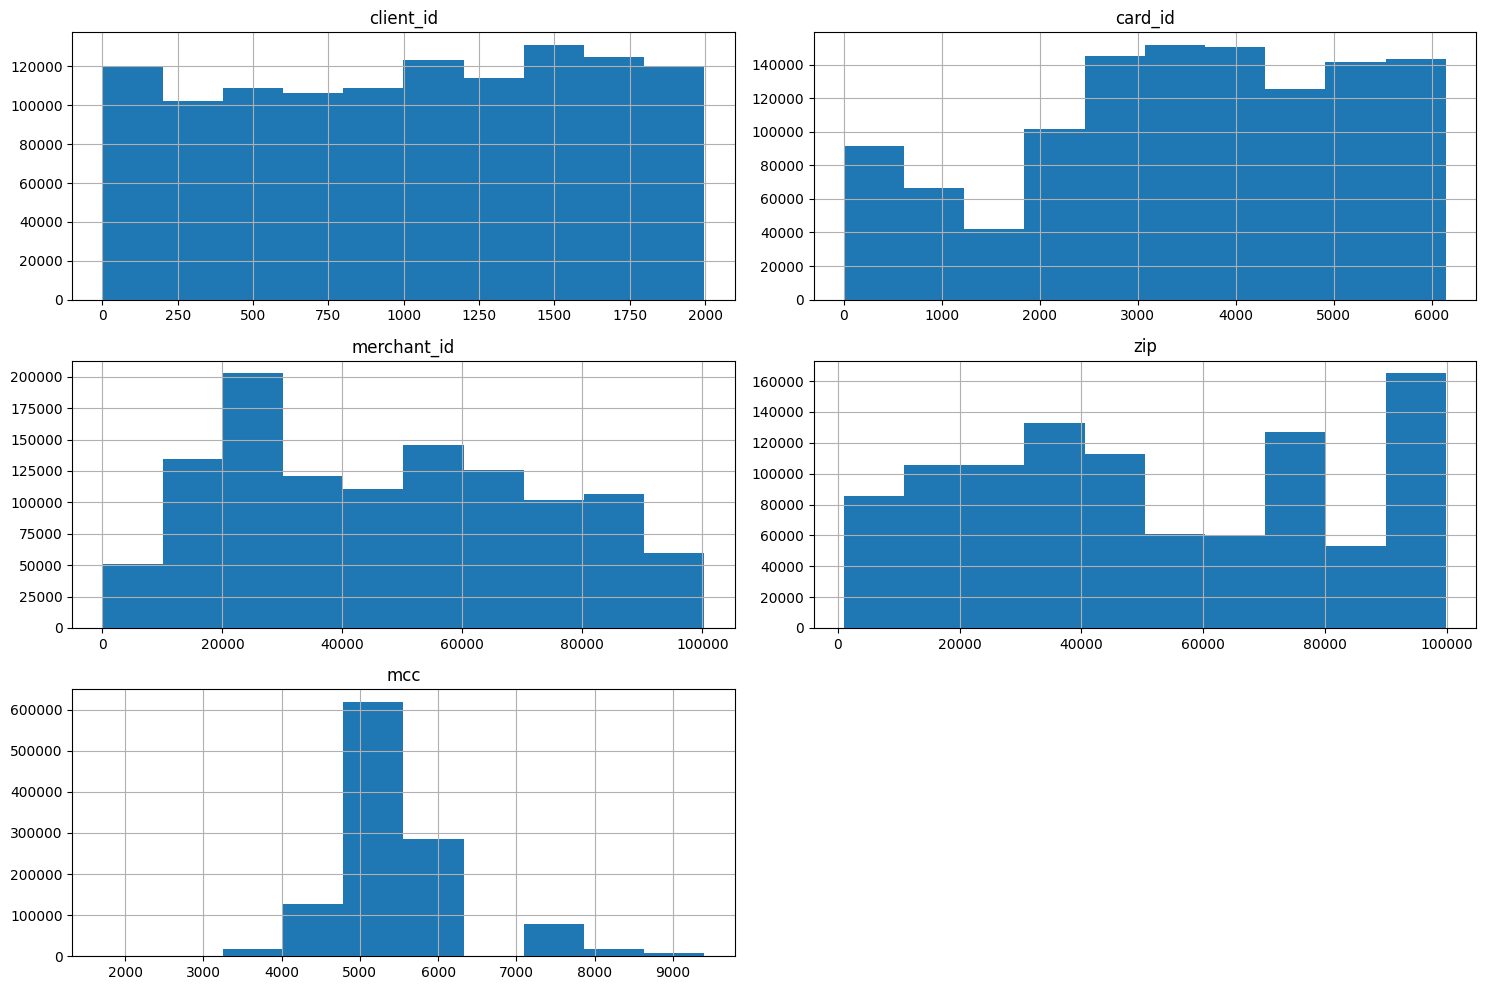

In [27]:
#histograms for numerical variables
df[['client_id','card_id','merchant_id','zip','mcc']].hist(figsize=(15,10))
plt.tight_layout()
plt.show()


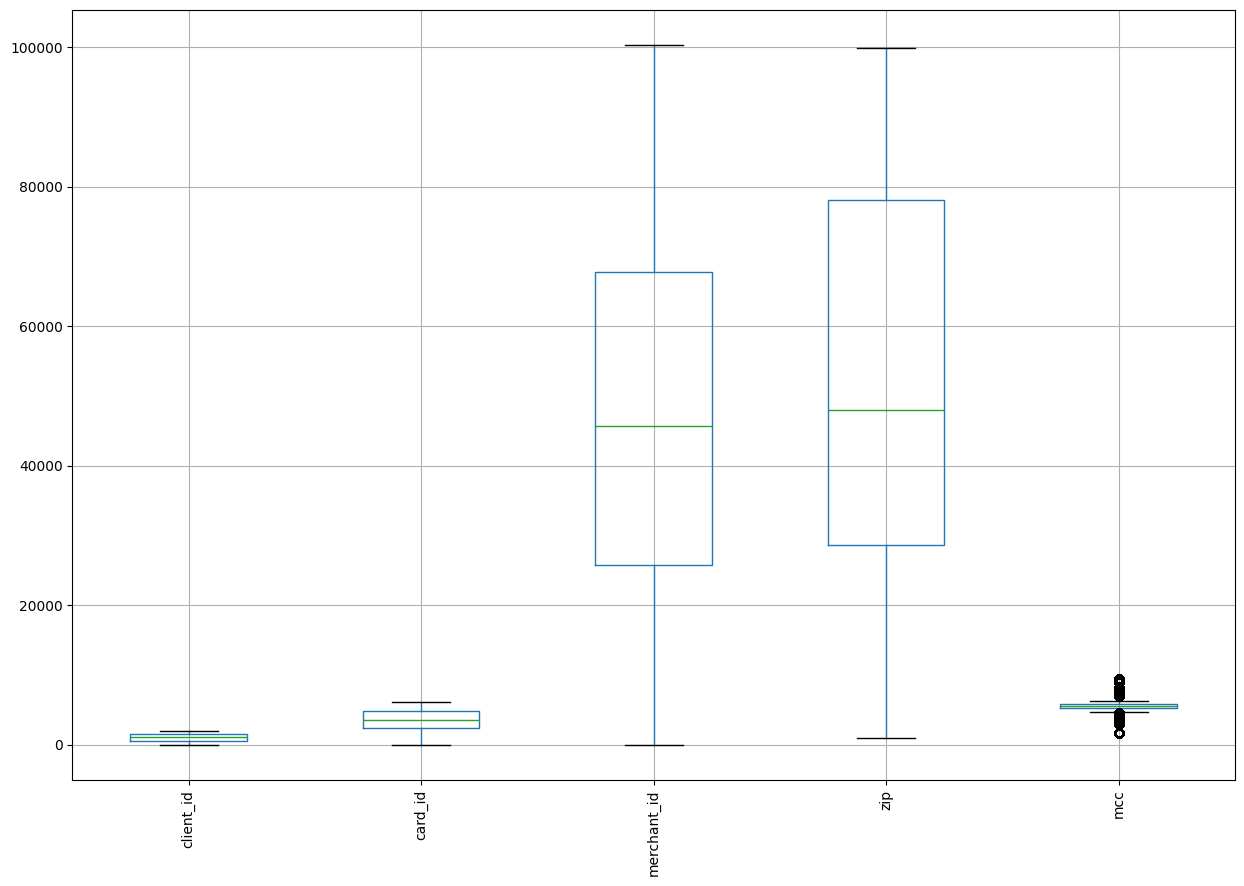

In [28]:
#boxplots for numerical features
plt.figure(figsize=(15,10))
df[['client_id','card_id','merchant_id','zip','mcc']].boxplot(rot=90)
plt.show()


In [29]:
print("Use Chip Frequency:\n", df['use_chip'].value_counts(), "\n")
print("Merchant City Frequency:\n", df['merchant_city'].value_counts(), "\n")
print("Merchant State Frequency:\n", df['merchant_state'].value_counts(), "\n")
print("Error Label Frequency:\n", df['errors'].value_counts(), "\n")




Use Chip Frequency:
 use_chip
Chip Transaction      823180
Swipe Transaction     196799
Online Transaction    139987
Name: count, dtype: int64 

Merchant City Frequency:
 merchant_city
ONLINE         141071
Houston         12324
Brooklyn         7342
Miami            7298
Los Angeles      6759
                ...  
Ferrisburgh         1
Pecos               1
Thorofare           1
Ravena              1
King Ferry          1
Name: count, Length: 7123, dtype: int64 

Merchant State Frequency:
 merchant_state
CA            124019
TX             87358
NY             74200
FL             59588
OH             42047
               ...  
Guyana             6
Micronesia         5
Bangladesh         3
Azerbaijan         2
Bahrain            1
Name: count, Length: 112, dtype: int64 

Error Label Frequency:
 errors
Insufficient Balance                     11558
Bad PIN                                   2800
Technical Glitch                          2333
Bad Card Number                            70

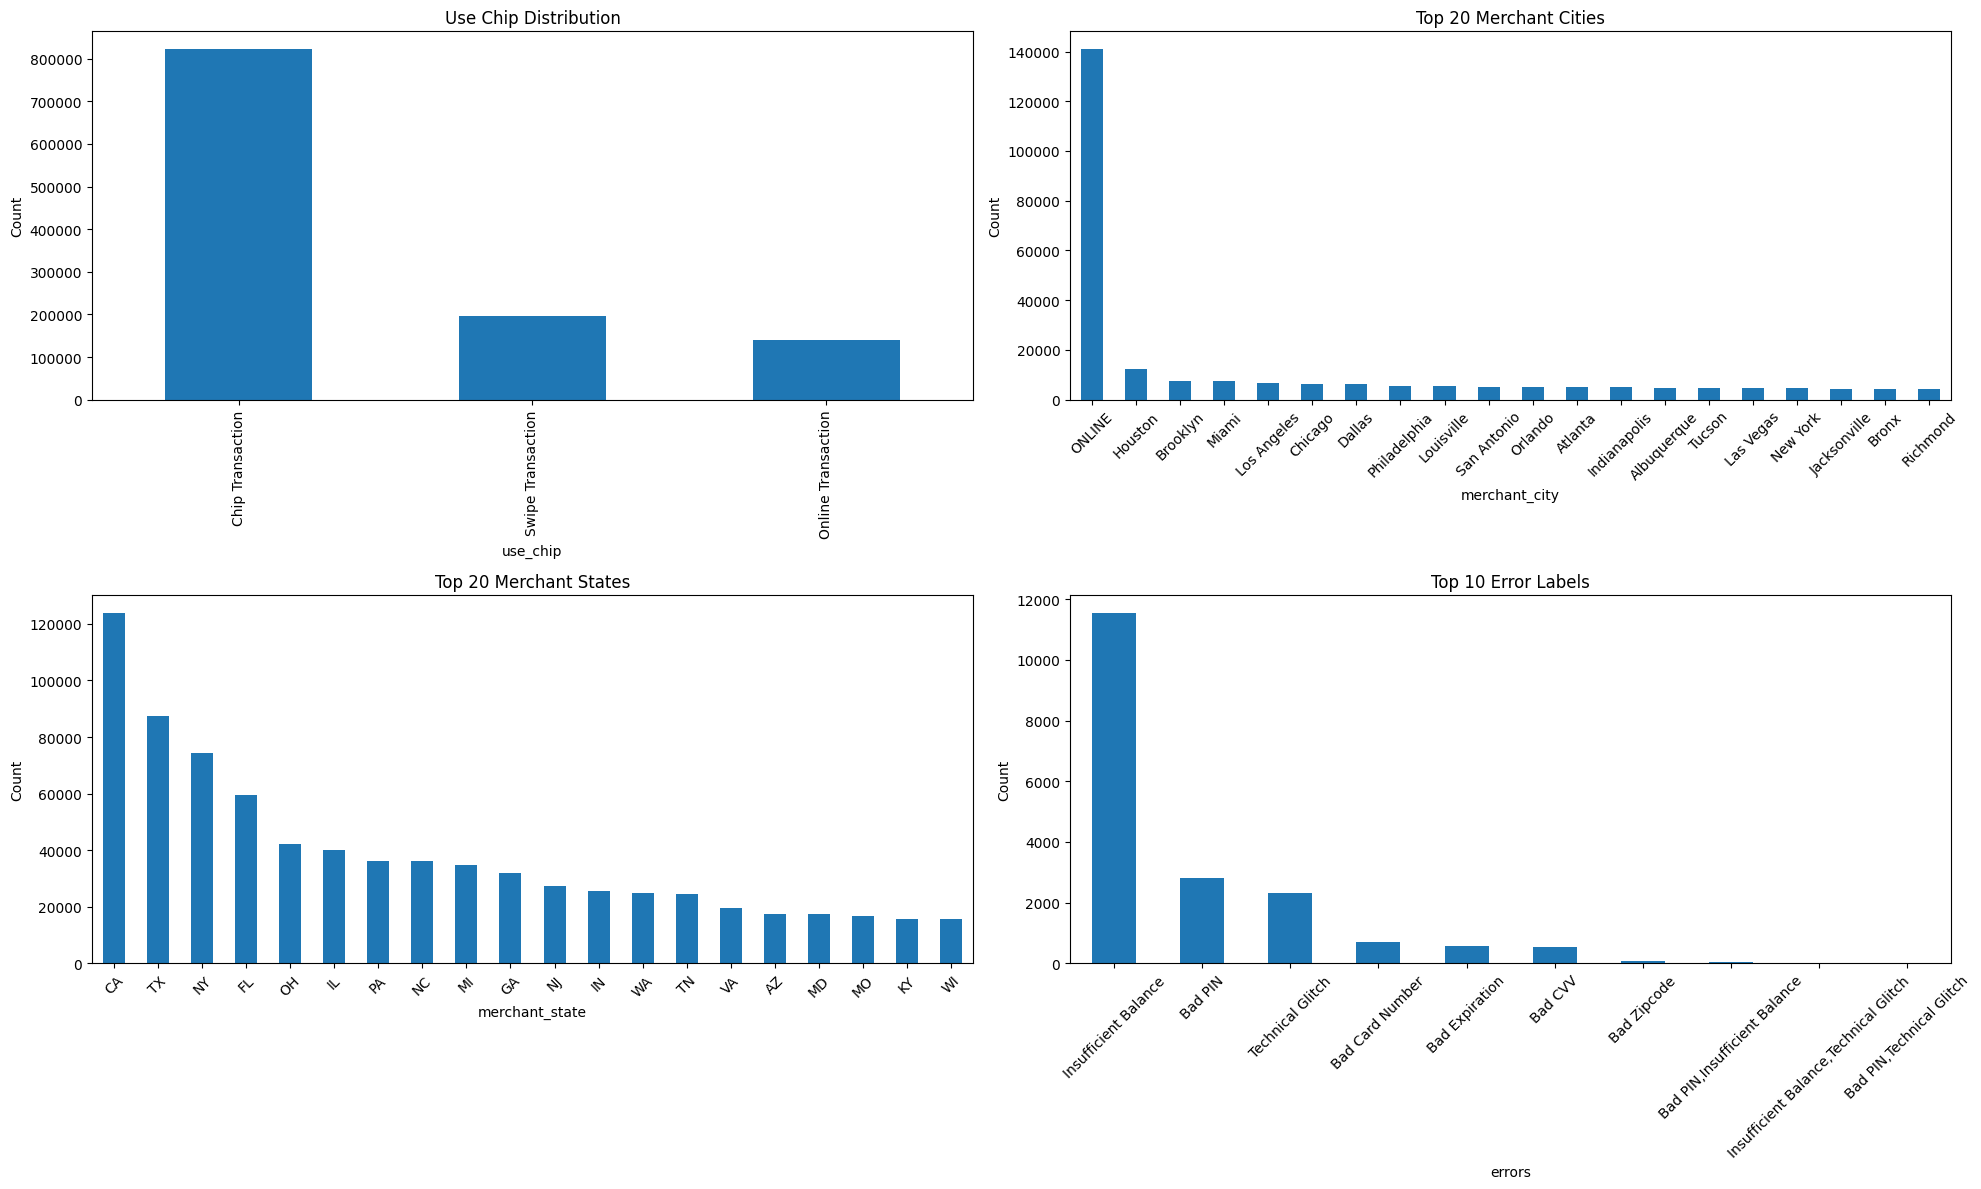

In [30]:
# Categorical features
categorical_cols = ['use_chip', 'merchant_city', 'merchant_state', 'errors']

plt.figure(figsize=(20,12))

# 1. use_chip
plt.subplot(2, 2, 1)
df['use_chip'].value_counts().plot(kind='bar')
plt.title("Use Chip Distribution")
plt.xlabel("use_chip")
plt.ylabel("Count")

# 2. Top 20 merchant_city
plt.subplot(2, 2, 2)
df['merchant_city'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Merchant Cities")
plt.xlabel("merchant_city")
plt.ylabel("Count")
plt.xticks(rotation=45)

# 3. Top 20 merchant_state
plt.subplot(2, 2, 3)
df['merchant_state'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Merchant States")
plt.xlabel("merchant_state")
plt.ylabel("Count")
plt.xticks(rotation=45)

# 4. Top 10 errors
plt.subplot(2, 2, 4)
df['errors'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Error Labels")
plt.xlabel("errors")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


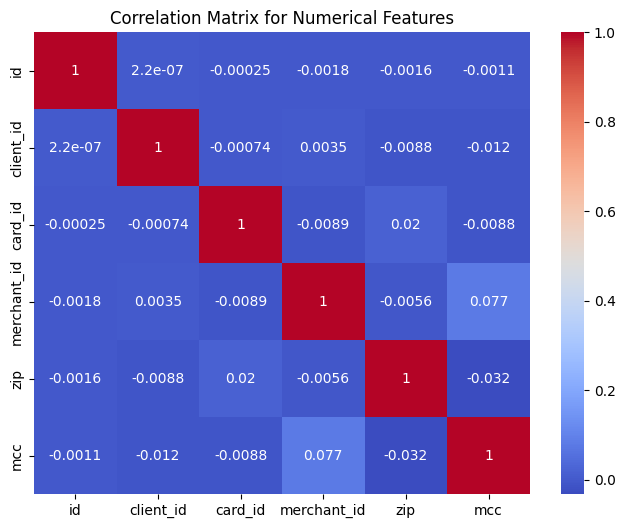

In [31]:
# numerical features for correlation
numerical_cols = ['id', 'client_id', 'card_id', 'merchant_id', 'zip', 'mcc']

# correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Numerical Features")
plt.show()


Errors by chip usage:

use_chip
Chip Transaction      12524
Online Transaction     3256
Swipe Transaction      2874
Name: errors, dtype: int64


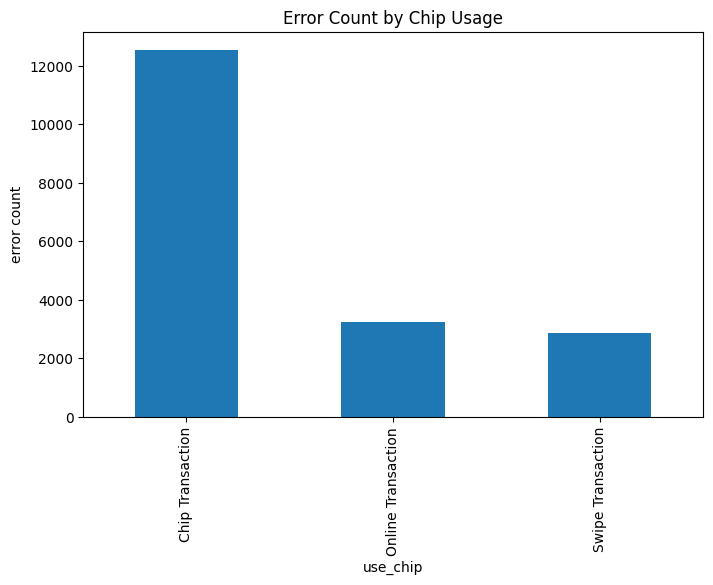

In [32]:
# Grouped summary of how errors differ between chip and swipe transactions

errors_by_chip = df.groupby('use_chip')['errors'].count()

print("Errors by chip usage:\n")
print(errors_by_chip)

plt.figure(figsize=(8,5))
errors_by_chip.plot(kind='bar')
plt.title("Error Count by Chip Usage")
plt.xlabel("use_chip")
plt.ylabel("error count")
plt.show()